# Time-series Analysis

In this script, we will perform a time-series analysis to examine the evolution of trust in the government between 2015 and 2022 for the happiest country, determined by the average happiness rank. We'll start by aggregating the average happiness rank to identify the happiest country and then delve into the time-series analysis to uncover meaningful insights.

## INDEX

- [Find Happiest Country](#Find-which-country-is-the-happiest-by-the-average-happiness-rank.)
- [Data Preparation for Time-series Analysis](#Data-Preparation-for-Time-series-Analysis)
- [Decomposition](#Decomposition)

In [1]:
#import necessary libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm #
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
#import the dataset for World Happiness Report 
path = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data/Clean/whr_merged.csv'
df = pd.read_csv (os.path.join(path))

#### Find which country is the happiest by the average happiness rank. 


In [5]:
#Aggregate the average of Happiness Rank
# Lower the happier 
df_happyrank= df.groupby(['Country'])['Happiness Rank'].agg(np.average)

In [7]:
#Turn it into a dataframe
df_happyrank = pd.DataFrame(df_happyrank)

In [10]:
df_happyrank = df_happyrank.reset_index() #resetting the index

In [18]:
df_happyrank_sorted = df_happyrank.sort_values(by='Happiness Rank', ascending=True) #order them in an ascending order
df_happyrank_sorted.head() #show Top 5

,Country,Happiness Rank
38,Denmark,2.125
46,Finland,2.625
60,Iceland,3.375
141,Switzerland,3.500
109,Norway,4.125


##### Denmark is the happiest country by average

In the last analysis, we learned that `Trust in the government` plays a crucial role in experiencing happiness for the countries in the Top 3 Happy region (Denmark is part of Western Europe). 

Let's use a Time-series Analysis to look at how the value changed over time. 

### Data Preparation for Time-series Analysis

In [23]:
#Make subset so that it only includes the data for Denmark
denmark_sub = df.loc[df['Country'] == 'Denmark']

In [73]:
#Select 'Year' and 'Trust (Government Corruption)' 
time_series = denmark_sub[['Year', 'Trust (Government Corruption)']]

In [74]:
time_series

,Year,Trust (Government Corruption)
2,2015,0.48357
158,2016,0.44453
316,2017,0.40077
472,2018,0.40800
627,2019,0.41000
783,2020,0.49526
936,2021,0.48500
1085,2022,0.53200


##### No missing values & no dips! 

In [78]:
time_series['datetime'].dtype

dtype('<M8[ns]')

In [76]:
#change 'Year' into datatype, datatime
time_series['datetime'] = pd.to_datetime(df['Year'], format='%Y')

In [81]:
data

,Year,Trust (Government Corruption)
datetime,,
2015-01-01,2015,0.48357
2016-01-01,2016,0.44453
2017-01-01,2017,0.40077
2018-01-01,2018,0.40800
2019-01-01,2019,0.41000
2020-01-01,2020,0.49526
2021-01-01,2021,0.48500
2022-01-01,2022,0.53200


In [82]:
#drop 'Year'
data = data.drop(columns='Year')

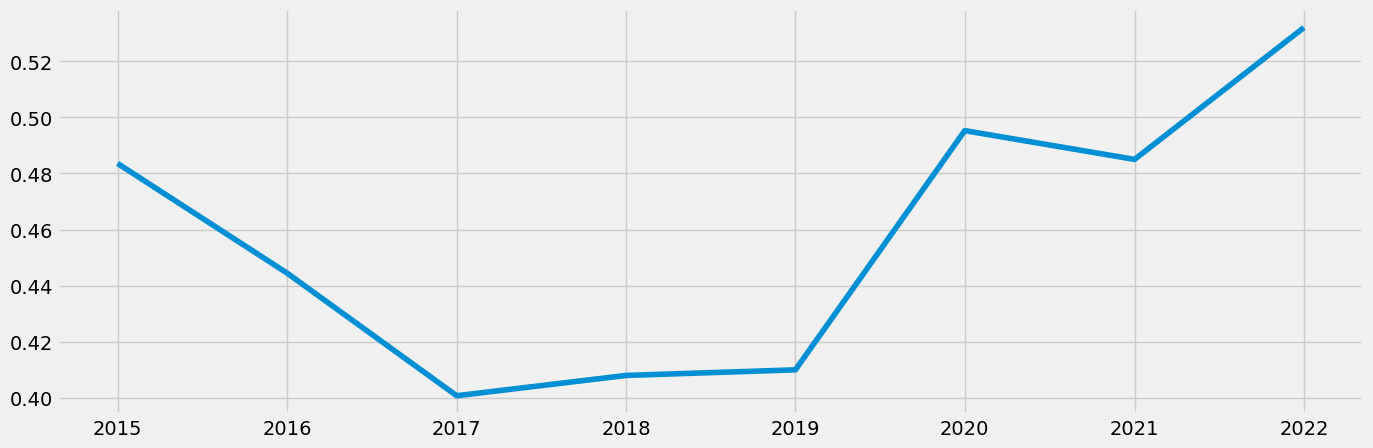

In [83]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

### Decomposition

Since the change is not linear, we need to use multiplicative model

In [84]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [86]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

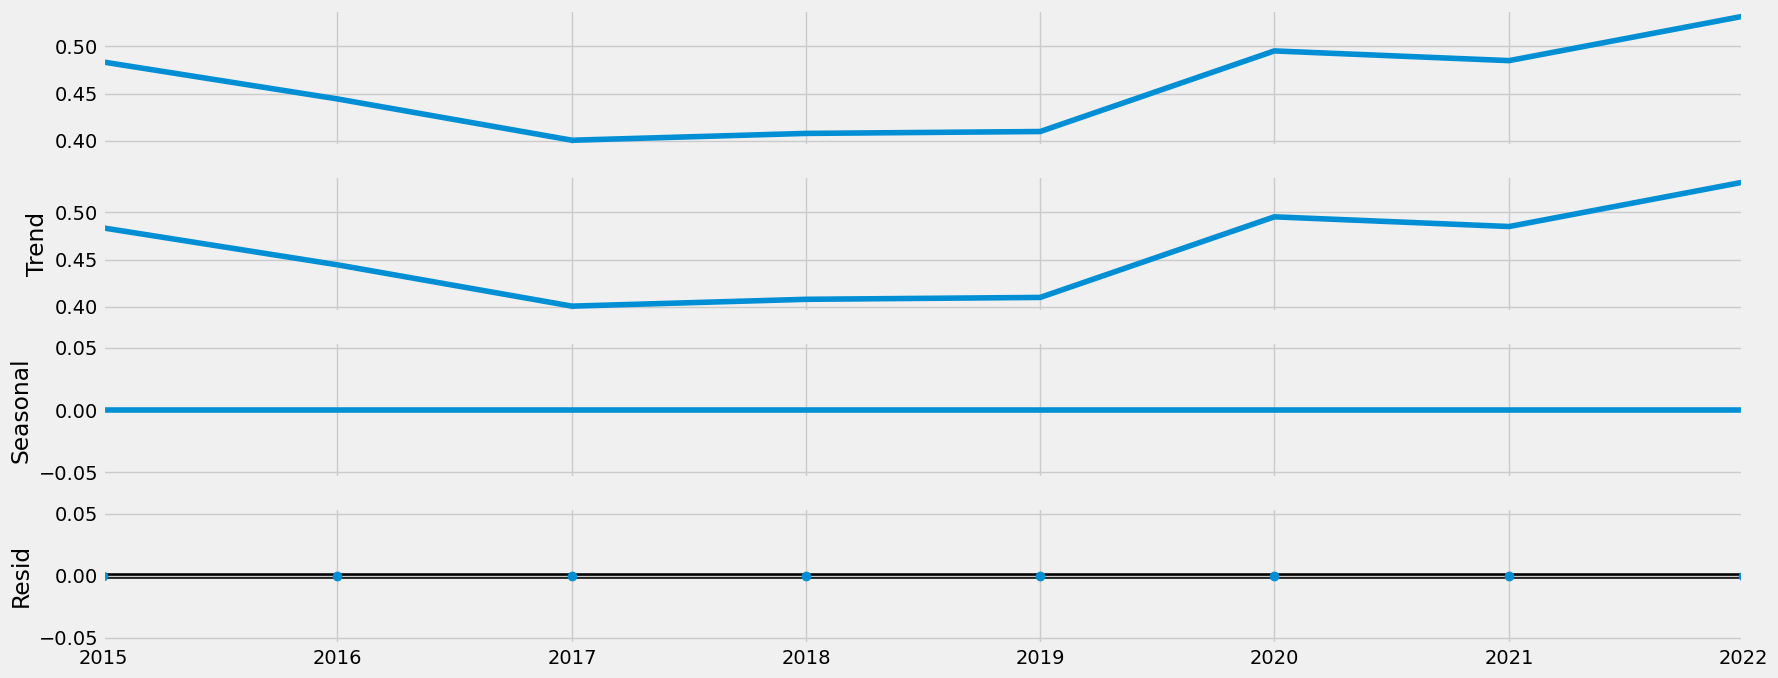

In [87]:
# Plot the separate components

decomposition.plot()
plt.show()

##### Key Insights

- The trend in the chart above shows a gradual decline from 2015 to 2019. However, starting in 2019, there is an evident upward trend, possibly attributed to the successful Covid-19 campaigns. This positive trend has continued until the present year.
- No seasonality is observed.
- No residual is observed.

### Testing for Stationarity

In [90]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Trust (Government Corruption)'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.289454
p-value                        0.015356
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


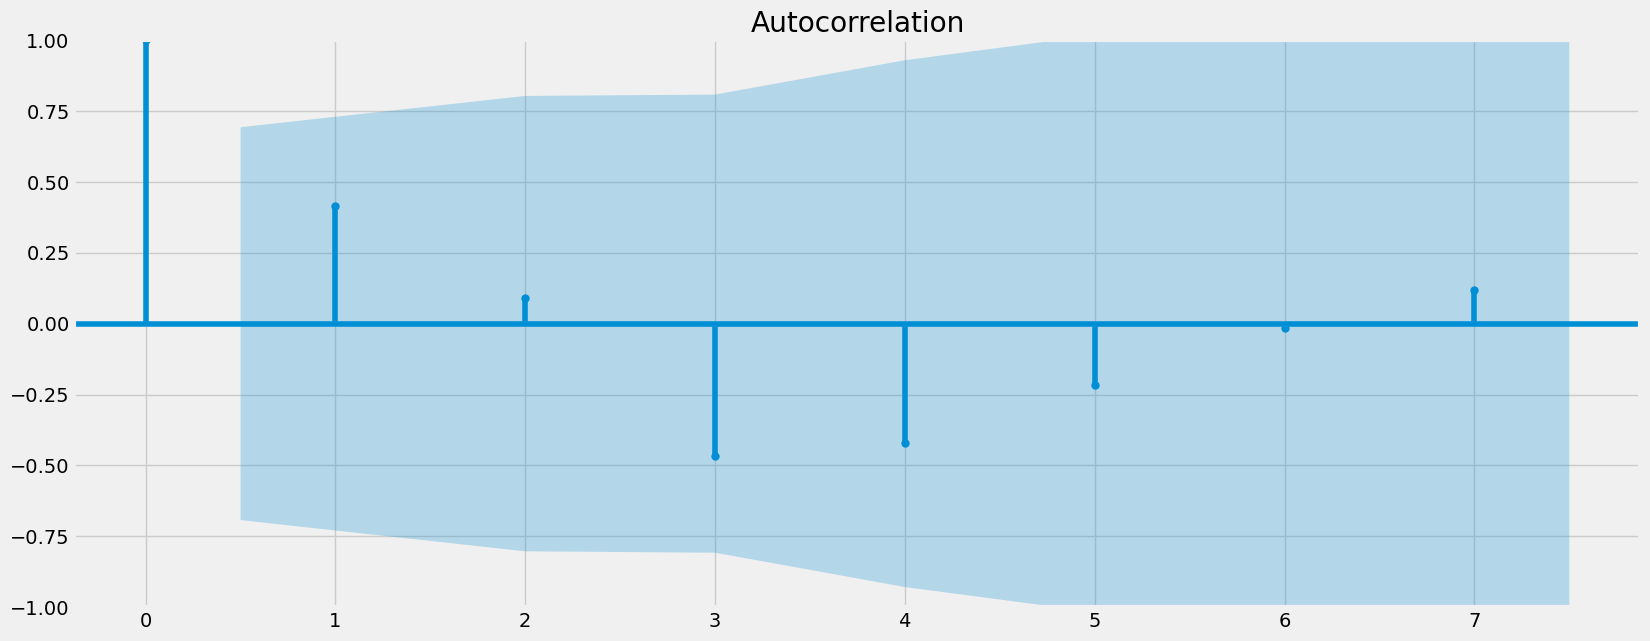

In [92]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

##### Key Insights

- Using a significance level of 5 percent. the “Critical Value (5%)” in the results has a value of  -3.929280. This is bigger than the test statistic, which is -3.289454, which means there's no unit root. 

- Although there is one data point that seems autocorrelated, we can confidently say, overall, there's no autocorrelation.


#### Since this data is stationary, we will not conduct stationarization. 

## Back to the [TOP](#INDEX)